In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

tickers = {
    'S&P 500': '^GSPC',
    'NASDAQ 100': '^NDX',
    'Dow Jones': '^DJI',
    'FTSE 100': '^FTSE',
    'DAX 30': '^GDAXI',
    'NIKKEI 225': '^N225'
}

end_date = datetime.today()
start_date = end_date - timedelta(days=5*365)

data = yf.download(list(tickers.values()),
                   start=start_date.strftime('%Y-%m-%d'),
                   end=end_date.strftime('%Y-%m-%d'),
                   auto_adjust=False)['Adj Close']

data.columns = list(tickers.keys())
data.dropna(inplace=True)

returns = data.pct_change().dropna()

[*********************100%***********************]  6 of 6 completed


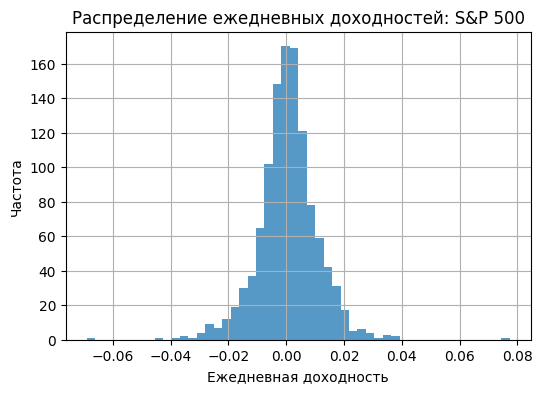

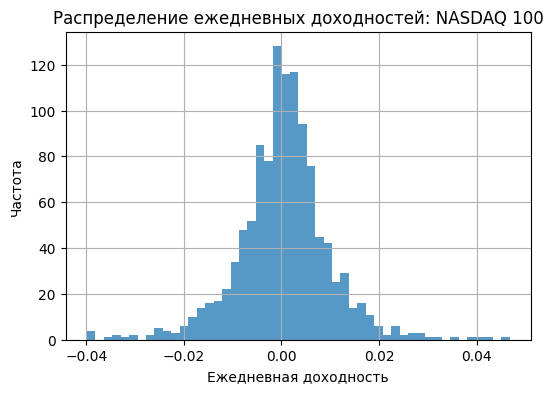

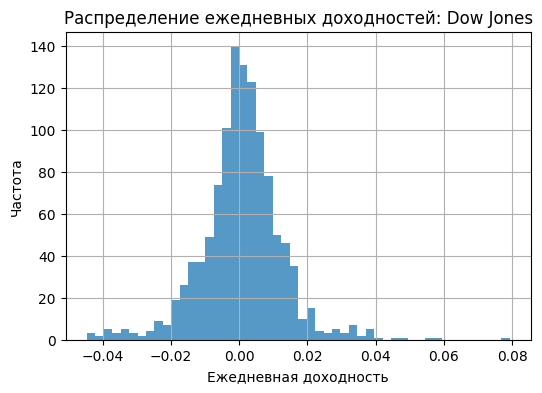

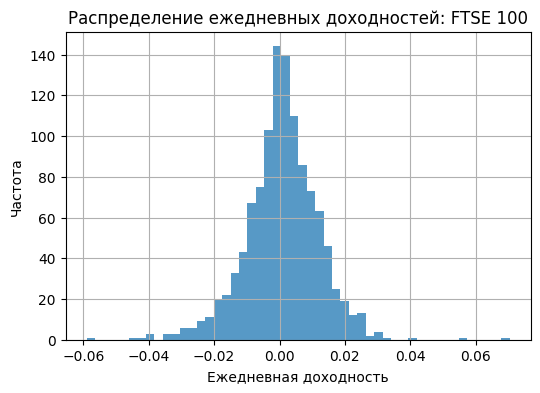

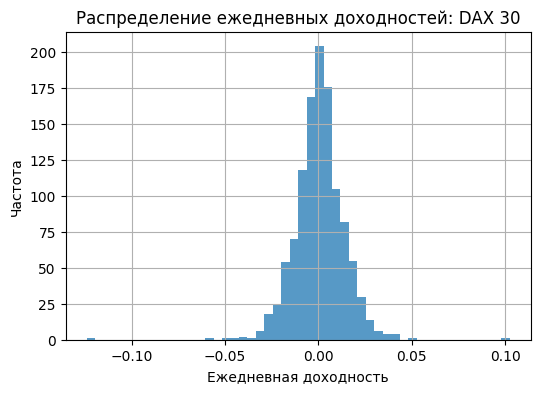

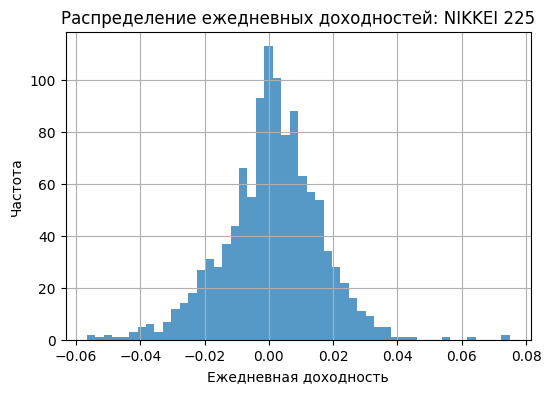

In [3]:
# 3.1
for index in returns.columns:
    plt.figure(figsize=(6,4))
    plt.hist(returns[index], bins=50, alpha=0.75)
    plt.title(f'Распределение ежедневных доходностей: {index}')
    plt.xlabel('Ежедневная доходность')
    plt.ylabel('Частота')
    plt.grid(True)
    plt.show()



In [6]:
# 3.2
mean_daily_returns = returns.mean()
cov_daily = returns.cov()

# Приводим показатели к годовому выражению (252 торговых дня в году)
mean_annual = mean_daily_returns * 252
cov_annual = cov_daily * 252

print("Годовые средние доходности:")
print(mean_annual)
print("\nГодовая матрица ковариаций:")
print(cov_annual)


Годовые средние доходности:
S&P 500       0.154375
NASDAQ 100    0.104156
Dow Jones     0.197375
FTSE 100      0.185315
DAX 30        0.170295
NIKKEI 225    0.227402
dtype: float64

Годовая матрица ковариаций:
             S&P 500  NASDAQ 100  Dow Jones  FTSE 100    DAX 30  NIKKEI 225
S&P 500     0.027523    0.012988   0.018423  0.027509  0.008501    0.029148
NASDAQ 100  0.012988    0.022567   0.022877  0.012370  0.009868    0.010527
Dow Jones   0.018423    0.022877   0.036641  0.019400  0.012735    0.020335
FTSE 100    0.027509    0.012370   0.019400  0.032559  0.009145    0.040076
DAX 30      0.008501    0.009868   0.012735  0.009145  0.044423    0.009795
NIKKEI 225  0.029148    0.010527   0.020335  0.040076  0.009795    0.058091


In [8]:
# 3.3
mu = mean_annual.values # ожидаемые доходности
Sigma = cov_annual.values 
n = len(mu)
ones = np.ones(n)

inv_Sigma = np.linalg.inv(Sigma)
w_mvp = inv_Sigma @ ones / (ones.T @ inv_Sigma @ ones)
w_mvp_series = pd.Series(w_mvp, index=mean_annual.index)

mvp_return = w_mvp_series.dot(mean_annual)
mvp_variance = w_mvp_series.T @ cov_annual @ w_mvp_series
mvp_std = np.sqrt(mvp_variance)

print("\nВеса портфеля:")
print(w_mvp_series)
print(f"\nОжидаемая годовая доходность: {mvp_return:.4f}")
print(f"Годовое стандартное отклонение: {mvp_std:.4f}")




Веса портфеля:
S&P 500       0.300597
NASDAQ 100    0.636550
Dow Jones    -0.215492
FTSE 100      0.039705
DAX 30        0.213950
NIKKEI 225    0.024689
dtype: float64

Ожидаемая годовая доходность: 0.1196
Годовое стандартное отклонение: 0.1273


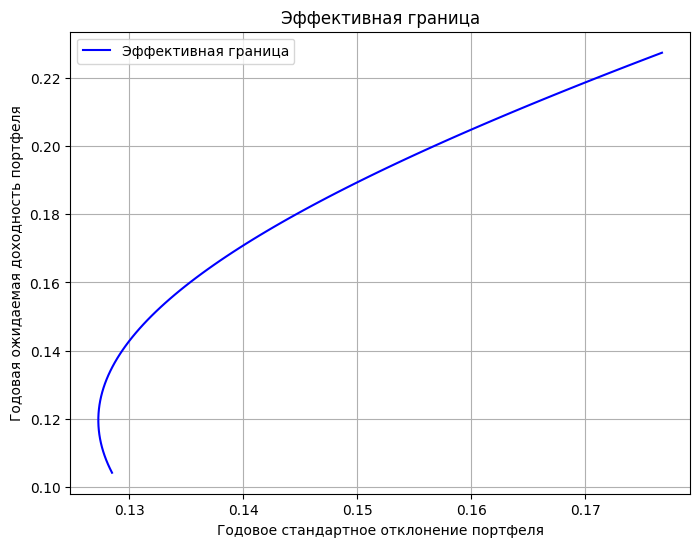

In [10]:
# 3.4
A = ones.T @ inv_Sigma @ ones
B = ones.T @ inv_Sigma @ mu
C = mu.T @ inv_Sigma @ mu
D = A * C - B**2

target_returns = np.linspace(min(mean_annual), max(mean_annual), 100)
efficient_std = []

for target in target_returns:
    var = (A * target**2 - 2 * B * target + C) / D
    efficient_std.append(np.sqrt(var))

# Строим график эффективной границы в пространстве (σ, μ)
plt.figure(figsize=(8,6))
plt.plot(efficient_std, target_returns, 'b-', label='Эффективная граница')
plt.xlabel('Годовое стандартное отклонение портфеля')
plt.ylabel('Годовая ожидаемая доходность портфеля')
plt.title('Эффективная граница')
plt.legend()
plt.grid(True)
plt.show()